In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv('financial_data.csv')
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df.shape

(17908, 21)

In [5]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [6]:
df['e_signed'].value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [8]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [9]:
df.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [10]:
df.drop('entry_id',axis=1,inplace=True)

In [11]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [12]:
Age=[]
for i in range(len(df)):
    if df['age'][i]>40:
        Age.append('senior')
    else:
        Age.append('junior')

In [13]:
Age[:2]

['junior', 'senior']

In [16]:
for i in range(len(df)):
    df['Total_Months_Employed'][i]=df['months_employed'][i]+df['years_employed'][i]*12

In [77]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,Total_Months_Employed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,36
1,61,weekly,0,3180,0,6,3,2,7,1,...,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,72
2,23,weekly,0,1540,6,0,0,7,1,1,...,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,6
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,72
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,60


In [18]:
for i in range(len(df)):
    df['personal_account'][i]=df['personal_account_m'][i]+df['personal_account_y'][i]*12
  

In [80]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,Total_Months_Employed,personal_account
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,36,30
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,72,86
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,6,19
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,72,86
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,60,98


In [81]:
df.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'Total_Months_Employed', 'personal_account'],
      dtype='object')

In [83]:
for i in range(len(df)):
    df['avg_risk_score'][i]=(df['risk_score_2'][i]+df['risk_score_3'][i]+df['risk_score_4'][i]+df['risk_score_5'][i])/4

In [52]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,Total_Months,personal_account,avg_risk_score
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,36,30,0.661151
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,72,86,0.789841
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,6,19,0.691712
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,72,86,0.793179
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,60,98,0.688483


In [20]:
for i in range(len(df)):
    df['avg_sxt_score'][i]=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2

In [86]:
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_risk_score,avg_sxt_score
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,36,30,0.661151,0.480918
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,72,86,0.789841,0.680720
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,6,19,0.691712,0.531712
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,72,86,0.793179,0.692552
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,60,98,0.688483,0.744634


In [57]:
df.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'Total_Months', 'personal_account', 'avg_risk_score',
       'avg_sxt_score'],
      dtype='object')

In [21]:
df.drop(['months_employed',
       'years_employed','personal_account_m',
       'personal_account_y',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2',],axis=1,inplace=True)

In [22]:
df.head()

,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score
0,40,bi-weekly,1,3135,3,1,550,36200,10,1,36,30,0.480918
1,61,weekly,0,3180,3,1,600,30150,9,0,72,86,0.680720
2,23,weekly,0,1540,0,1,450,34550,7,0,6,19,0.531712
3,40,bi-weekly,0,5230,1,1,700,42150,8,1,72,86,0.692552
4,33,semi-monthly,0,3590,2,1,1100,53850,12,0,60,98,0.744634


In [23]:
df['current_address_year'].value_counts()

2     3628
1     2772
3     2762
4     1994
0     1486
5     1286
6     1182
9      692
8      652
7      617
10     598
11     228
12      11
Name: current_address_year, dtype: int64

In [24]:
Age[:5]

['junior', 'senior', 'junior', 'junior', 'junior']

In [25]:
df2=pd.DataFrame(Age)

In [26]:
df2.head()

,0
0,junior
1,senior
2,junior
3,junior
4,junior


In [27]:
df3=pd.concat([df,df2],axis=1)

In [28]:
df3.head()

,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score,0
0,40,bi-weekly,1,3135,3,1,550,36200,10,1,36,30,0.480918,junior
1,61,weekly,0,3180,3,1,600,30150,9,0,72,86,0.680720,senior
2,23,weekly,0,1540,0,1,450,34550,7,0,6,19,0.531712,junior
3,40,bi-weekly,0,5230,1,1,700,42150,8,1,72,86,0.692552,junior
4,33,semi-monthly,0,3590,2,1,1100,53850,12,0,60,98,0.744634,junior


In [29]:
df3.rename(columns={0:'Age'},inplace=True)

In [30]:
df3.head()

,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score,Age
0,40,bi-weekly,1,3135,3,1,550,36200,10,1,36,30,0.480918,junior
1,61,weekly,0,3180,3,1,600,30150,9,0,72,86,0.680720,senior
2,23,weekly,0,1540,0,1,450,34550,7,0,6,19,0.531712,junior
3,40,bi-weekly,0,5230,1,1,700,42150,8,1,72,86,0.692552,junior
4,33,semi-monthly,0,3590,2,1,1100,53850,12,0,60,98,0.744634,junior


In [31]:
df3.drop('age',axis=1,inplace=True)


In [32]:
df3.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score,Age
0,bi-weekly,1,3135,3,1,550,36200,10,1,36,30,0.480918,junior
1,weekly,0,3180,3,1,600,30150,9,0,72,86,0.680720,senior
2,weekly,0,1540,0,1,450,34550,7,0,6,19,0.531712,junior
3,bi-weekly,0,5230,1,1,700,42150,8,1,72,86,0.692552,junior
4,semi-monthly,0,3590,2,1,1100,53850,12,0,60,98,0.744634,junior


In [33]:
df3=pd.get_dummies(df3,drop_first=True)

In [34]:
df3.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,Age_senior
0,1,3135,3,1,550,36200,10,1,36,30,0.480918,0,0,0,0
1,0,3180,3,1,600,30150,9,0,72,86,0.680720,0,0,1,1
2,0,1540,0,1,450,34550,7,0,6,19,0.531712,0,0,1,0
3,0,5230,1,1,700,42150,8,1,72,86,0.692552,0,0,0,0
4,0,3590,2,1,1100,53850,12,0,60,98,0.744634,0,1,0,0


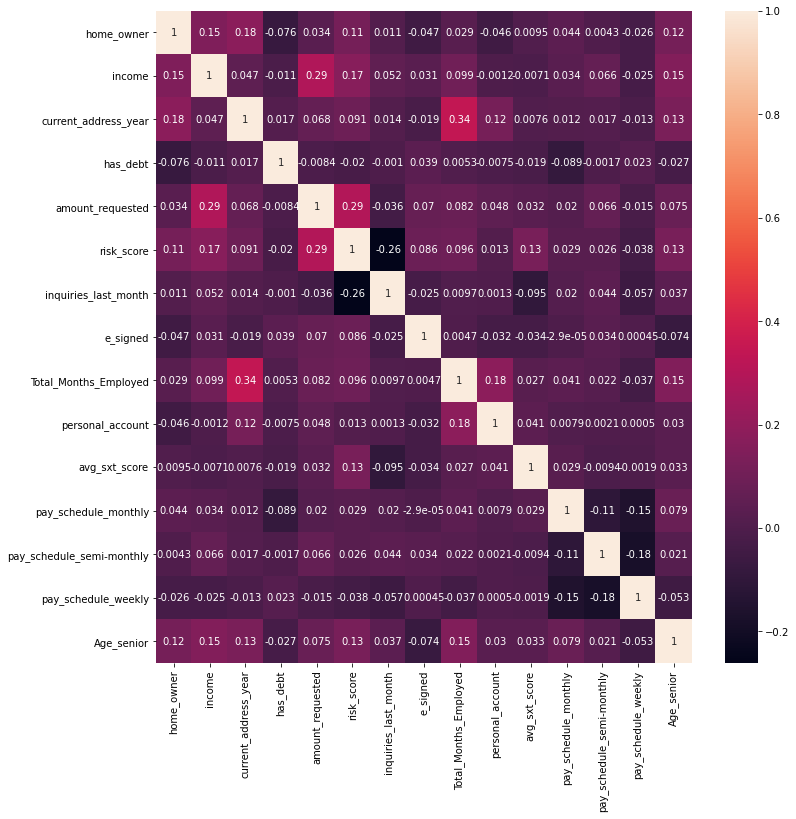

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df3.corr(),annot=True)

In [36]:
X=df3.drop('e_signed',axis=1)
Y=df3['e_signed']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [39]:
X[:2]

array([[ 1.16274812, -0.34702152, -0.21247839,  0.50717957, -0.573275  ,
        -1.61664186,  0.96454775, -0.28053451, -0.66503007, -1.22893632,
        -0.30147461, -0.35497329, -0.50996266, -1.11325637],
       [-0.86003149, -0.31711817, -0.21247839,  0.50717957, -0.50169552,
        -2.00965659,  0.69228999,  1.06453893,  1.74272499,  0.50424578,
        -0.30147461, -0.35497329,  1.96092787,  0.89826569]])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
X_train.shape

(14326, 14)

In [42]:
Y_train.shape

(14326,)

<b>Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

random=RandomForestClassifier()
random.fit(X_train,Y_train)

RandomForestClassifier()

In [45]:
pred=random.predict(X_test)

In [46]:
pred[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [47]:
Y_test[:5]

3629     1
1820     1
6685     0
17241    1
8332     1
Name: e_signed, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [49]:
accuracy_score(Y_test,pred)

0.6273031825795645

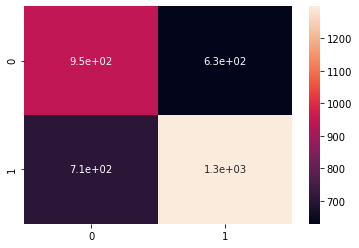

In [50]:
cm=confusion_matrix(pred,Y_test)
sns.heatmap(cm,annot=True)

<b>Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
gradient = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2,random_state=0)

In [52]:
gradient.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [53]:
pred_grad=gradient.predict(X_test)

In [54]:
pred_grad[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [55]:
Y_test[:5]

3629     1
1820     1
6685     0
17241    1
8332     1
Name: e_signed, dtype: int64

In [56]:
accuracy_score(Y_test,pred_grad)

0.5829145728643216

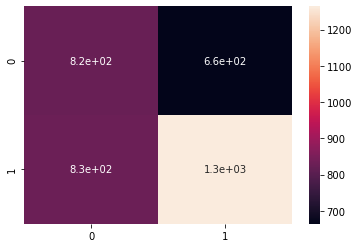

In [57]:
cm=confusion_matrix(pred_grad,Y_test)
sns.heatmap(cm,annot=True)

<b>XG Boost

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)

[15:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
pred_xgb=xgb.predict(X_test)

In [62]:
pred_xgb[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [63]:
Y_test[:5]

3629     1
1820     1
6685     0
17241    1
8332     1
Name: e_signed, dtype: int64

In [64]:
accuracy_score(Y_test,pred_xgb)

0.631211613623674

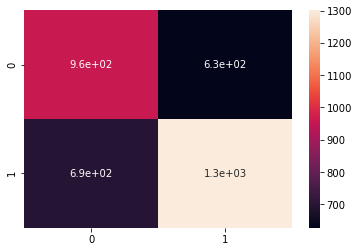

In [65]:
cm=confusion_matrix(pred_xgb,Y_test)
sns.heatmap(cm,annot=True)

<b>Adaboost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=1),n_estimators=400,learning_rate=1)

In [68]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=400)

In [69]:
pred_ada=ada.predict(X_test)

In [70]:
pred_ada[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [71]:
Y_test[:5]

3629     1
1820     1
6685     0
17241    1
8332     1
Name: e_signed, dtype: int64

In [72]:
accuracy_score(Y_test,pred_ada)

0.6102735901730877

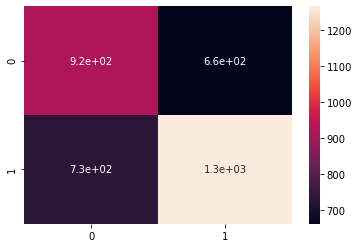

In [73]:
cm=confusion_matrix(pred_ada,Y_test)
sns.heatmap(cm,annot=True)

<b> Standard Vector Machine

In [157]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0)

In [158]:
svm.fit(X_train,Y_train)

SVC(random_state=0)

In [159]:
pred_svm=svm.predict(X_test)

In [160]:
pred_svm[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [161]:
accuracy_score(Y_test,pred_svm)

0.5926856504745952

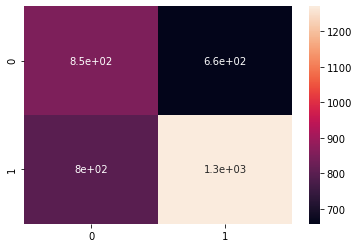

In [162]:
cm=confusion_matrix(pred_svm,Y_test)
sns.heatmap(cm,annot=True)

<b> Deep Learning

In [74]:
import tensorflow as tf
from tensorflow import keras

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [94]:
df5=df.copy()

In [95]:
df5.head()

,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score
0,40,bi-weekly,1,3135,3,1,550,36200,10,1,36,30,0.480918
1,61,weekly,0,3180,3,1,600,30150,9,0,72,86,0.680720
2,23,weekly,0,1540,0,1,450,34550,7,0,6,19,0.531712
3,40,bi-weekly,0,5230,1,1,700,42150,8,1,72,86,0.692552
4,33,semi-monthly,0,3590,2,1,1100,53850,12,0,60,98,0.744634


In [96]:
df5=pd.get_dummies(df5)

In [121]:
df5.head()

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,e_signed,Total_Months_Employed,personal_account,avg_sxt_score,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,3,1,550,36200,10,1,36,30,0.480918,1,0,0,0
1,61,0,3180,3,1,600,30150,9,0,72,86,0.680720,0,0,0,1
2,23,0,1540,0,1,450,34550,7,0,6,19,0.531712,0,0,0,1
3,40,0,5230,1,1,700,42150,8,1,72,86,0.692552,1,0,0,0
4,33,0,3590,2,1,1100,53850,12,0,60,98,0.744634,0,0,1,0


In [122]:
X_deep=df5.drop('e_signed',axis=1)

In [130]:
Y_deep=pd.get_dummies(df5['e_signed'])

In [131]:
Y_deep[:5]

,0,1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [132]:
Y_deep.shape

(17908, 2)

In [133]:
scalerdeep=StandardScaler()
X_deep=scalerdeep.fit_transform(X_deep)

In [134]:
X_deep_train,X_deep_test,Y_deep_train,Y_deep_test=train_test_split(X_deep,Y_deep,test_size=0.2,random_state=0)

In [135]:
X_deep_train.shape

(14326, 15)

In [136]:
Y_deep_train.shape

(14326, 2)

In [137]:
Y_deep_train[:2]

,0,1
5957,1,0
16854,0,1


In [138]:
model=Sequential()


model.add(Dense(64, input_dim=X_deep_train.shape[1] , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(196, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [139]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 196)               25284     
_________________________________________________________________
dropout_14 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)              

In [140]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [144]:
history=model.fit(X_deep_train,Y_deep_train,epochs=100,validation_data=(X_deep_test,Y_deep_test),batch_size=10)

Epoch 1/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6419 - accuracy: 0.6239 - val_loss: 0.6370 - val_accuracy: 0.6150
Epoch 2/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6438 - accuracy: 0.6192 - val_loss: 0.6392 - val_accuracy: 0.6125
Epoch 3/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6431 - accuracy: 0.6201 - val_loss: 0.6390 - val_accuracy: 0.6161
Epoch 4/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6445 - accuracy: 0.6137 - val_loss: 0.6401 - val_accuracy: 0.6170
Epoch 5/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6450 - accuracy: 0.6165 - val_loss: 0.6414 - val_accuracy: 0.6136
Epoch 6/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6433 - accuracy: 0.6256 - val_loss: 0.6397 - val_accuracy: 0.6136
Epoch 7/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6448 - accuracy: 0.6214 - val_loss: 0.6384 - val_ac

1433/1433 [==============================] - 2s 2ms/step - loss: 0.6405 - accuracy: 0.6191 - val_loss: 0.6384 - val_accuracy: 0.6145
Epoch 58/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6385 - accuracy: 0.6284 - val_loss: 0.6358 - val_accuracy: 0.6142
Epoch 59/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6384 - accuracy: 0.6218 - val_loss: 0.6356 - val_accuracy: 0.6173
Epoch 60/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6363 - accuracy: 0.6269 - val_loss: 0.6351 - val_accuracy: 0.6164
Epoch 61/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6415 - accuracy: 0.6227 - val_loss: 0.6357 - val_accuracy: 0.6164
Epoch 62/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6414 - accuracy: 0.6242 - val_loss: 0.6386 - val_accuracy: 0.6181
Epoch 63/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6394 - accuracy: 0.6262 - val_loss: 0.6380 - val_accuracy

In [145]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


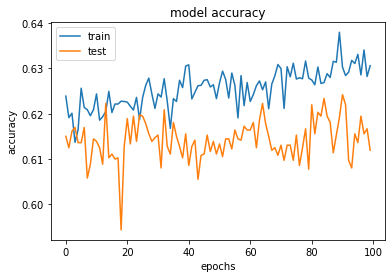

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

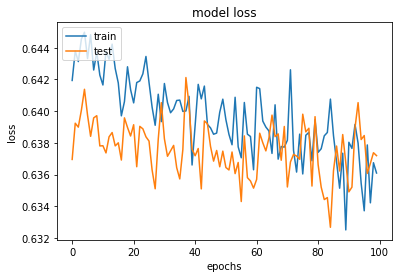

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [148]:
pred_deep=model.predict(X_deep_test)

In [149]:
pred_deep

array([[0.79728293, 0.20272142],
       [0.45831043, 0.54169184],
       [0.5031974 , 0.4968041 ],
       ...,
       [0.5157513 , 0.48425004],
       [0.5165702 , 0.48343056],
       [0.4227959 , 0.5772065 ]], dtype=float32)

In [150]:
l=[]
for i in pred_deep:
    if i[0]>0.5:
        l.append(1)
    else:
        l.append(0)

In [151]:
l[:5]

[1, 0, 1, 0, 0]

In [154]:
Y_deep_test[:5][0]

3629     0
1820     0
6685     1
17241    0
8332     0
Name: 0, dtype: uint8

In [155]:
Y_deep_test[0]

3629     0
1820     0
6685     1
17241    0
8332     0
        ..
7546     0
9836     0
7446     0
9526     0
13946    0
Name: 0, Length: 3582, dtype: uint8

In [156]:
accuracy_score(Y_deep_test[0],l)

0.6119486320491345

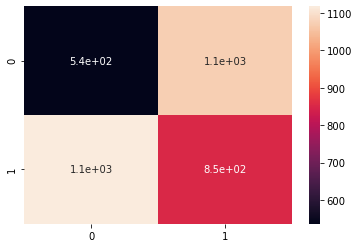

In [164]:
cm=confusion_matrix(l,Y_test)
sns.heatmap(cm,annot=True)

<b>Models implemented:<br><br>
 Random Forest Classifier<br>
 Gradient Boosting<br>
 XG Boost<br>
 Ada Boost<br>
 Support Vector Machine<br>
 Artificial Neural Network<br>

<b>XgBoost Algorithm performs the best and give the accuracy of 63 %